In [1]:
# 1. Get a rough idea of the data
# Import necessary libraries
from sequenzo import *  # Sequenzo package
import pandas as pd     # Data manipulation
import matplotlib.pyplot as plt
from matplotlib.axes import Axes


ModuleNotFoundError: No module named 'sequenzo'

In [3]:
# Import pandas as pd
df = pd.read_csv('/Users/lei/Documents/sequenzo_all_folders/sequence_data_sources/sohee/sequence_data.csv')
df

,PID,25m01,25m02,25m03,25m04,25m05,25m06,25m07,25m08,25m09,...,35m05,35m06,35m07,35m08,35m09,35m10,35m11,35m12,race,sex
0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3,2
1,3,6.0,6.0,6.0,5.0,5.0,5.0,1.0,1.0,1.0,...,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,2
2,4,5.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,2
3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1
4,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,12515,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2
6572,12516,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
6573,12517,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1
6574,12558,5.0,5.0,5.0,5.0,6.0,5.0,6.0,3.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2,2


In [4]:
time_list = list(df.columns)[1:121]
states = [1.0,2.0,3.0,4.0,5.0,6.0]
# states = ['FT+WC', 'FT+BC', 'PT+WC','PT+BC', 'U', 'OLF']
labels = ['FT+WC', 'FT+BC', 'PT+WC','PT+BC', 'U', 'OLF']
sequence_data = SequenceData(df, 
                             time=time_list, 
                             time_type = "age", 
                             states=states, 
                             labels = labels,
                             id_col = 'PID'
                             )

sequence_data


[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added np.nan to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = [At Home, Left Home, np.nan]
        labels = [At Home, Left Home, Missing]

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 6576
[>] Number of time points: 120
[>] Min/Max sequence length: 15 / 120
[>] There are 4354 missing values across 472 sequences.
    First few missing sequence IDs: [11, 33, 82, 95, 141, 144, 150, 156, 229, 253] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
4415                   105
7574                    69
3449                    60
8

SequenceData(6576 sequences, States: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan])

In [5]:
sequence_data.uniqueness_stats()

{'n_sequences': 6576,
 'n_unique': 5415,
 'uniqueness_rate': 0.8234489051094891,
 'counts': pattern_id
 0       645
 1707    302
 5386     96
 3672      6
 3651      6
        ... 
 1833      1
 1832      1
 1831      1
 1830      1
 5414      1
 Length: 5415, dtype: int64,
 'examples':    pattern_id  freq                                            example
 0           0   645  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 1        1707   302  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
 2        5386    96  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
 3        3672     6  [5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
 4        3651     6  [5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 5         607     5  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 6        3076     4  [3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 7        3719     4  [5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 8        4136     4  [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
hk_df = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/code/qiqi_test/qianyi/hk_seq.csv')

hk_df_with_ids = assign_unique_ids(
   hk_df,
   id_col_name="id"  # optional, default = "Entity ID"
)

# Create a SequenceData object

# Define the time-span variable
time_list = list(hk_df_with_ids.columns)[91:]

states = ['HK', 'QA', 'KW', 'LB', 'SA', 'SG', 'AE', 'MY', 'TW', 'HN', 'OT']

# TODO: write a try and error: if no such a parameter, then ask to pass the right ones
# sequence_data = SequenceData(df, time=time, time_type="year", id_col="country", ids=df['country'].values, states=states)

sequence_data = SequenceData(hk_df_with_ids, time=time_list, time_type="age", id_col="id", states=states)

sequence_data.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 549
[>] Number of time points: 90
[>] Min/Max sequence length: 90 / 90
[>] States: ['HK', 'QA', 'KW', 'LB', 'SA', 'SG', 'AE', 'MY', 'TW', 'HN', 'OT']
[>] Labels: ['HK', 'QA', 'KW', 'LB', 'SA', 'SG', 'AE', 'MY', 'TW', 'HN', 'OT']


{'n_sequences': 549,
 'n_unique': 137,
 'uniqueness_rate': 0.2495446265938069,
 'counts': pattern_id
 129    374
 0       10
 8        4
 14       4
 98       3
       ... 
 43       1
 42       1
 40       1
 39       1
 136      1
 Length: 137, dtype: int64,
 'examples':    pattern_id  freq                                            example
 0         129   374  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
 1           0    10  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 2           8     4  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
 3          14     4  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...
 4          98     3  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
 5          97     3  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
 6         105     3  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
 7         125     3  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
 8          41     2  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
 9     

In [2]:
family_df = pd.read_csv('/Users/lei/Documents/sequenzo_all_folders/sequence_data_sources/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/sequenzo_all_folders/sequence_data_sources/multidomain_algorithm/happiness_15_35.csv')

family_df

,ID,15,16,17,18,19,20,21,22,23,...,26,27,28,29,30,31,32,33,34,35
0,1,1,1,1,1,1,1,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,1,2,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,5,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,6,1,1,2,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,7,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1992,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1534,1995,2,2,2,2,2,3,3,3,3,...,3,3,2,3,3,3,3,3,3,3
1535,1996,1,2,2,2,2,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1536,1997,1,1,1,1,1,1,2,3,3,...,3,3,3,3,3,3,3,3,3,3


In [6]:
time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))

family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=[1, 2, 3],
                               labels=["Single", "Romantic Partner", "Married"],
                               custom_colors=['#d8cbe2', '#e0605c', '#76508b'])

happiness_sequence = SequenceData(data=happiness_df,
                                 time_type='age',
                                 time=time_cols,
                                 states=[1, 2, 3, 4, 5],
                                 labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])

print(family_sequence.uniqueness_stats())

print(happiness_sequence.uniqueness_stats())


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Number of time points: 21
[>] Min/Max sequence length: 21 / 21
[>] States: [1, 2, 3]
[>] Labels: ['Single', 'Romantic Partner', 'Married']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Number of time points: 21
[>] Min/Max sequence length: 21 / 21
[>] States: [1, 2, 3, 4, 5]
[>] Labels: ['Unhappy', 'Somewhat unhappy', 'Neutral', 'Somewhat happy', 'Happy']
{'n_sequences': 1538, 'n_unique': 859, 'uniqueness_rate': 0.55851755526658}
{'n_sequences': 1538, 'n_unique': 895, 'uniqueness_rate': 0.581924577373212}


In [7]:
family_sequence.uniqueness_stats()

{'n_sequences': 1538, 'n_unique': 859, 'uniqueness_rate': 0.55851755526658}

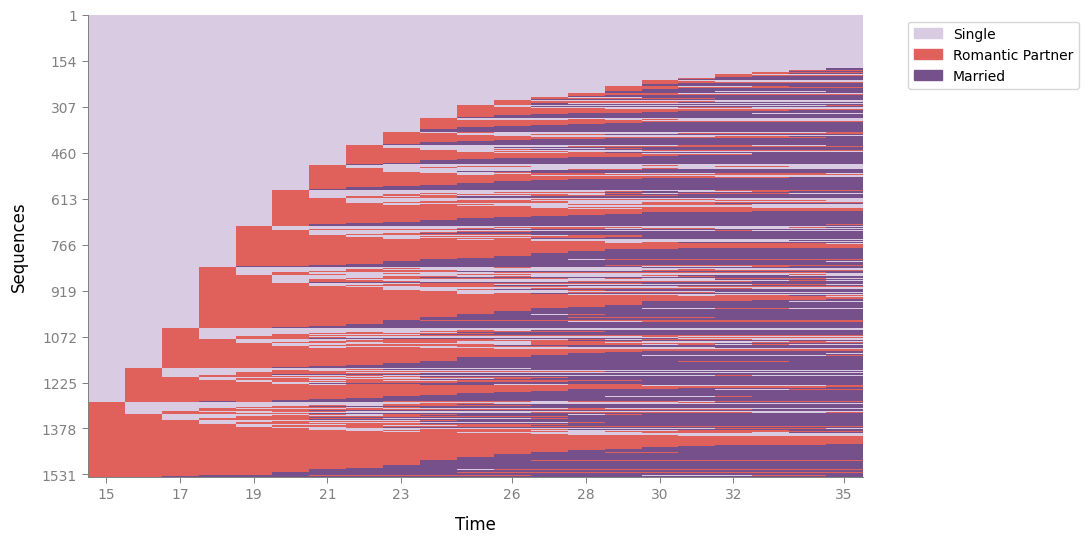

<Figure size 640x480 with 0 Axes>

In [8]:
plot_sequence_index(family_sequence)

In [47]:
def order_by_full_sequence(df: pd.DataFrame, state_cols):
    # tuple of the whole sequence
    seq_tuples = df[state_cols].apply(tuple, axis=1)
    # frequency of each exact sequence
    freq_map = seq_tuples.value_counts()
    freqs = seq_tuples.map(freq_map)

    # sort: most frequent sequences first, then lexicographic by the tuple
    df2 = (df.assign(_seq=seq_tuples, _freq=freqs)
             .sort_values(['_freq', '_seq'], ascending=[False, True])
             .drop(columns=['_seq', '_freq'])
             .reset_index(drop=True))
    return df2

In [61]:
def sort_by_full_sequence(seqdata):
    seqs = [tuple(row) for row in seqdata.values]
    counts = pd.Series(seqs).value_counts()
    # 给每个序列一个排序 key：先按频率降序，再按序列字典序
    order = sorted(range(len(seqs)), key=lambda i: (-counts[seqs[i]], seqs[i]))
    return np.array(order)

def set_up_time_labels_for_x_axis(seqdata: SequenceData,
                                  ax: Axes,
                                  color: str = "gray") -> None:
    """
    Helper function to set up time labels for the x-axis.

    :param seqdata: (SequenceData) A SequenceData object containing time information
    :param ax: (matplotlib.axes.Axes) The axes to set labels on
    """
    # Extract time labels (year or age)
    time_labels = np.array(seqdata.cleaned_time)

    # Determine the number of time steps
    num_time_steps = len(time_labels)

    # Dynamic X-Tick Adjustment
    if num_time_steps <= 10:
        # If 10 or fewer time points, show all labels
        xtick_positions = np.arange(num_time_steps)
    elif num_time_steps <= 20:
        # If 10–20 time points, show every 2nd label
        xtick_positions = np.arange(0, num_time_steps, step=2)
    else:
        # More than 20 time points → Pick 10 evenly spaced tick positions
        xtick_positions = np.linspace(0, num_time_steps - 1, num=10, dtype=int)

    # Set x-ticks and labels dynamically
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(time_labels[xtick_positions], fontsize=10, rotation=0, ha="center", color=color)

def save_and_show_results(save_as=None, dpi=200, show=True):
    """
    Save and optionally display matplotlib figure.

    Parameters:
    - save_as: Optional filename to save the figure to
    - dpi: Resolution for saved image
    - show: Whether to display the figure (default: True)

    Returns:
    - The current figure object (plt.gcf())
    """
    if save_as:
        if not any(save_as.endswith(ext) for ext in ['.png', '.jpg', '.jpeg', '.pdf', '.svg']):
            save_as += '.png'
        plt.savefig(save_as, dpi=dpi, bbox_inches='tight')

    # Show if explicitly requested or if saving (for visual confirmation)
    if show or save_as:
        plt.show()

    # Prevent memory leak by closing after show/save
    plt.close()

    # Return the current figure
    return plt.gcf()

def plot_sequence_index_single(seqdata: SequenceData,
                                figsize=(10, 6),
                                title=None,
                                xlabel="Time",
                                ylabel="Sequences",
                                save_as=None,
                                dpi=200):
    """
    Efficiently creates a sequence index plot using `imshow` for faster rendering.

    :param data: (np.array or pd.DataFrame) 2D array where rows are sequences and columns are time points.
    :param num_colors: (int): Number of colors in the Spectral palette.
    :param reverse_colors: (bool): Whether to reverse the color scheme.
    :param figsize: (tuple): Size of the figure.
    :param xlabel: (str): Label for the x-axis.
    :param ylabel: (str): Label for the y-axis.
    :param title: (str): Title for the plot.

    :return None.
    """
    # Get sequence values as NumPy array
    sequence_values = seqdata.values.copy()

    # Ensure no NaN values interfere with sorting
    if np.isnan(sequence_values).any():
        sequence_values = np.where(np.isnan(sequence_values), -1, sequence_values)

    # Sort sequences lexicographically for better visualization
    # sorted_indices = np.lexsort(sequence_values.T[::-1])
    # Chang to the following:
    sorted_indices = sort_by_full_sequence(seqdata)
    sorted_data = sequence_values[sorted_indices]

    # Create the plot using imshow
    fig, ax = plt.subplots(figsize=figsize)
    # ax.imshow(sorted_data, aspect='auto', cmap=seqdata.get_colormap(), interpolation='nearest')
    ax.imshow(sorted_data, aspect='auto', cmap=seqdata.get_colormap(), interpolation='nearest', vmin=1,
              vmax=len(seqdata.states))

    # Disable background grid and all axis guide lines
    ax.grid(False)

    # Optional: remove tick marks and tick labels to avoid visual grid effects
    # ax.set_xticks([])
    # ax.set_yticks([])

    # x label
    set_up_time_labels_for_x_axis(seqdata, ax)

    # Enhance y-axis aesthetics
    num_sequences = sorted_data.shape[0]
    ytick_spacing = max(1, num_sequences // 10)

    ax.set_yticks(np.arange(0, num_sequences, step=ytick_spacing))
    ax.set_yticklabels(np.arange(1, num_sequences + 1, step=ytick_spacing), fontsize=10, color='black')

    # Enhance y-axis aesthetics
    ax.set_yticks(range(0, len(sorted_data), max(1, len(sorted_data) // 10)))
    ax.set_yticklabels(
        range(1, len(sorted_data) + 1, max(1, len(sorted_data) // 10)),
        fontsize=10,
        color='black'
    )

    # Customize axis line styles and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_linewidth(0.7)
    ax.tick_params(axis='x', colors='gray', length=4, width=0.7)
    ax.tick_params(axis='y', colors='gray', length=4, width=0.7)

    # Add labels and title
    ax.set_xlabel(xlabel, fontsize=12, labelpad=10, color='black')

    ax.set_ylabel(ylabel, fontsize=12, labelpad=10, color='black')
    if title:
        ax.set_title(title, fontsize=14, color='black')

    # Use legend from SequenceData
    ax.legend(*seqdata.get_legend(), bbox_to_anchor=(1.05, 1), loc='upper left')

    save_and_show_results(save_as, dpi=200)

In [64]:
df_U5 = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/synthetic_detailed_U5_N50000.csv')


# example usage after you create out_df
state_cols = [c for c in df_U5.columns if c.isdigit()]
# out_df_sorted_U5 = order_by_full_sequence(df_U5, state_cols)
# now plot out_df_sorted instead of out_df

df_U5

,id,1,2,3,4,5,6,7,8,9,10
0,1,Data science,Data science,Data science,Data science,Data,Data,Software,Software,Software,Software
1,2,Support & test,Software,Software,Software,Software,Software,Software,Software,Support & test,Support & test
2,3,Software,Software,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Support & test,Hardware
3,4,Software,Software,Software,Support & test,Support & test,Support & test,Support & test,Data,Data,Data
4,5,Data science,Data science,Support & test,Support & test,Support & test,Support & test,Support & test,Data,Data,Data
...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Support & test,Support & test,Support & test,Support & test,Support & test,Support & test,Software,Software,Software,Hardware
49996,49997,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Support & test,Software,Software,Software,Software,Software,Software
49997,49998,Software,Software,Software,Software,Software,Software,Software,Data,Data,Software
49998,49999,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Hardware,Hardware,Hardware,Hardware,Hardware,Software


In [66]:
time_cols = []

for i in list(range(1, 11)):
    time_cols.append(str(i))
    
states = ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']

U5_sequence = SequenceData(data=df_U5,
                               time_type='age',
                               time=time_cols,
                               states=states,
                               )

U5_sequence.uniqueness_stats()



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 50000
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 50000,
 'n_unique': 3000,
 'uniqueness_rate': 0.06,
 'counts': pattern_id
 2103    34
 2818    32
 1955    31
 1332    31
 2510    30
         ..
 1585     6
 2008     6
 479      6
 2156     5
 1374     4
 Length: 3000, dtype: int64,
 'examples':    pattern_id  freq                         example
 0        2103    34  [6, 6, 6, 2, 2, 2, 2, 2, 6, 6]
 1        2818    32  [7, 7, 7, 7, 5, 7, 7, 7, 2, 2]
 2        1955    31  [6, 3, 3, 3, 3, 3, 2, 2, 2, 2]
 3        1332    31  [5, 5, 5, 5, 5, 3, 3, 2, 2, 2]
 4        2510    30  [7, 5, 5, 5, 6, 6, 6, 6, 6, 6]
 5         751    30  [4, 4, 4, 4, 4, 4, 4, 7, 5, 5]
 6         325    30  [2, 2, 2, 2, 5, 5, 5, 5, 5, 5]
 7         245    29  [2, 2, 2, 1, 1, 7, 7, 7, 7, 7]
 8         293    29  [2, 2, 2, 2, 2, 2, 5, 5, 5, 5]
 9        2218    29  [6, 6, 6, 6, 6, 1, 5, 5, 5, 5]}

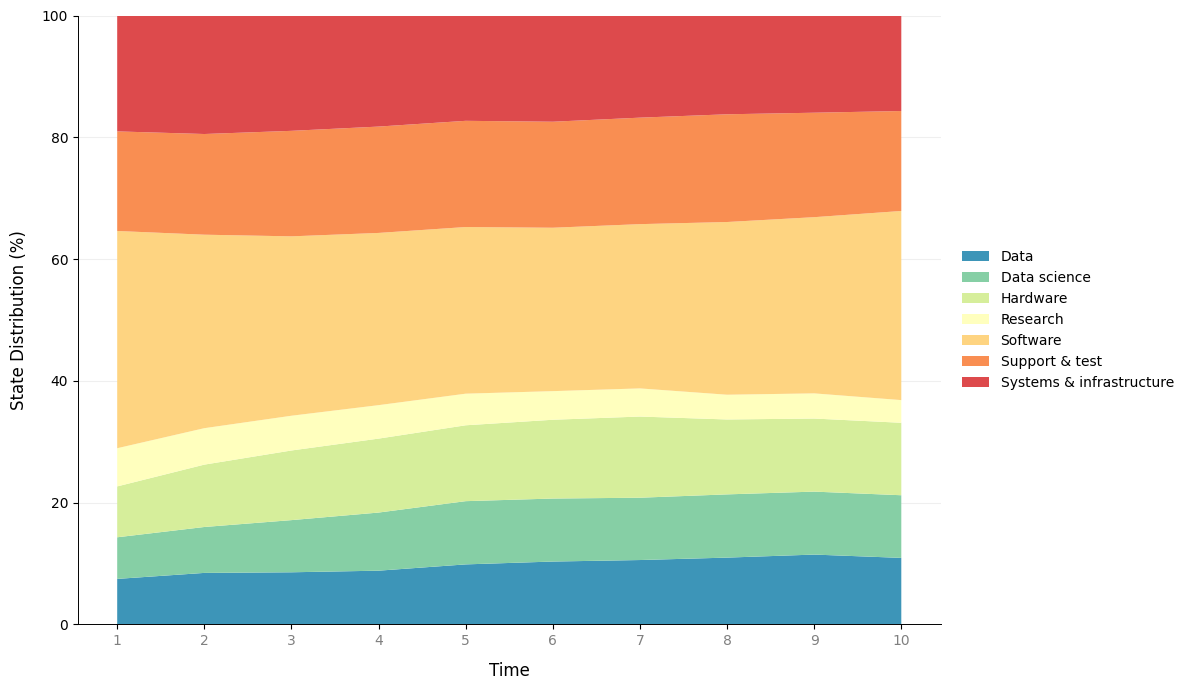

<Figure size 640x480 with 0 Axes>

In [75]:
plot_state_distribution(U5_sequence)

In [51]:
df_U25 = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/synthetic_detailed_U25_N50000.csv')

out_df_sorted_U25 = order_by_full_sequence(df_U25, state_cols)

U25_sequence = SequenceData(data=out_df_sorted_U25,
                               time_type='age',
                               time=time_cols,
                               states=states,
                               )

U25_sequence.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 50000
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 50000,
 'n_unique': 12750,
 'uniqueness_rate': 0.255,
 'counts': pattern_id
 12622    14
 855      13
 10361    13
 2919     12
 8774     11
          ..
 8599      1
 8606      1
 8607      1
 4727      1
 10412     1
 Length: 12750, dtype: int64,
 'examples':    pattern_id  freq                         example
 0       12622    14  [7, 7, 7, 7, 7, 7, 6, 6, 2, 2]
 1         855    13  [1, 1, 7, 7, 7, 7, 5, 5, 6, 6]
 2       10361    13  [6, 6, 7, 7, 2, 2, 2, 2, 3, 3]
 3        2919    12  [3, 3, 7, 7, 7, 7, 7, 6, 6, 6]
 4        8774    11  [6, 3, 3, 3, 3, 3, 3, 3, 3, 1]
 5        1462    11  [2, 2, 2, 2, 2, 5, 5, 5, 5, 7]
 6        1158    11  [2, 1, 1, 1, 1, 1, 1, 1, 1, 7]
 7        4380    11  [5, 2, 6, 6, 6, 1, 1, 4, 4, 4]
 8        3208    11  [4, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 9       10781    11  [7, 3, 3, 3, 5, 5, 5, 5, 5, 2]}

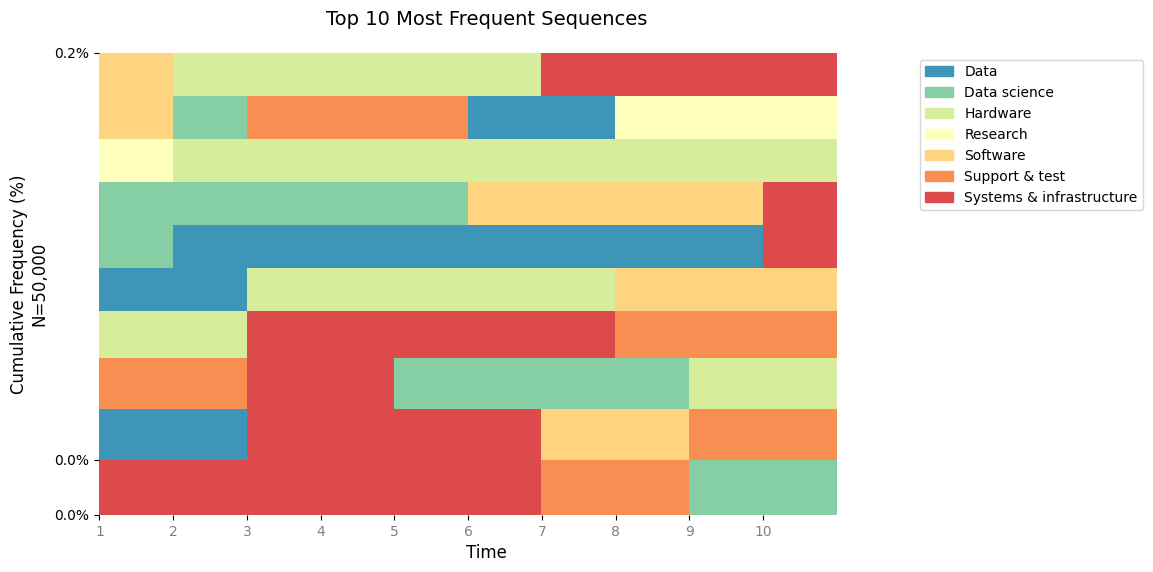

<Figure size 640x480 with 0 Axes>

In [72]:
plot_most_frequent_sequences(U25_sequence, 
                    # save_as='index_plot'
                    )

In [41]:
df_U50 = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/synthetic_detailed_U50_N50000.csv')

U50_sequence = SequenceData(data=df_U50,
                               time_type='age',
                               time=time_cols,
                               states=states,
                               )

U50_sequence.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 50000
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 50000,
 'n_unique': 25045,
 'uniqueness_rate': 0.5009,
 'counts': pattern_id
 12562    9
 16456    9
 12510    9
 2309     9
 5675     8
         ..
 6897     1
 6894     1
 16849    1
 16850    1
 18247    1
 Length: 25045, dtype: int64,
 'examples':    pattern_id  freq                         example
 0       12562     9  [5, 5, 5, 5, 2, 5, 5, 5, 5, 5]
 1       16456     9  [5, 6, 6, 6, 6, 6, 6, 5, 5, 7]
 2       12510     9  [5, 5, 5, 5, 2, 2, 2, 7, 7, 4]
 3        2309     9  [2, 1, 1, 5, 5, 5, 6, 6, 6, 6]
 4        5675     8  [3, 3, 6, 6, 6, 6, 6, 6, 6, 1]
 5       13098     8  [5, 5, 5, 5, 5, 2, 6, 4, 4, 4]
 6       18086     8  [6, 5, 5, 5, 5, 5, 5, 5, 5, 7]
 7       20466     8  [6, 6, 6, 7, 7, 7, 5, 5, 5, 5]
 8       16451     8  [5, 6, 6, 6, 6, 6, 6, 5, 3, 3]
 9       16480     7  [5, 6, 6, 6, 6, 6, 6, 6, 7, 3]}

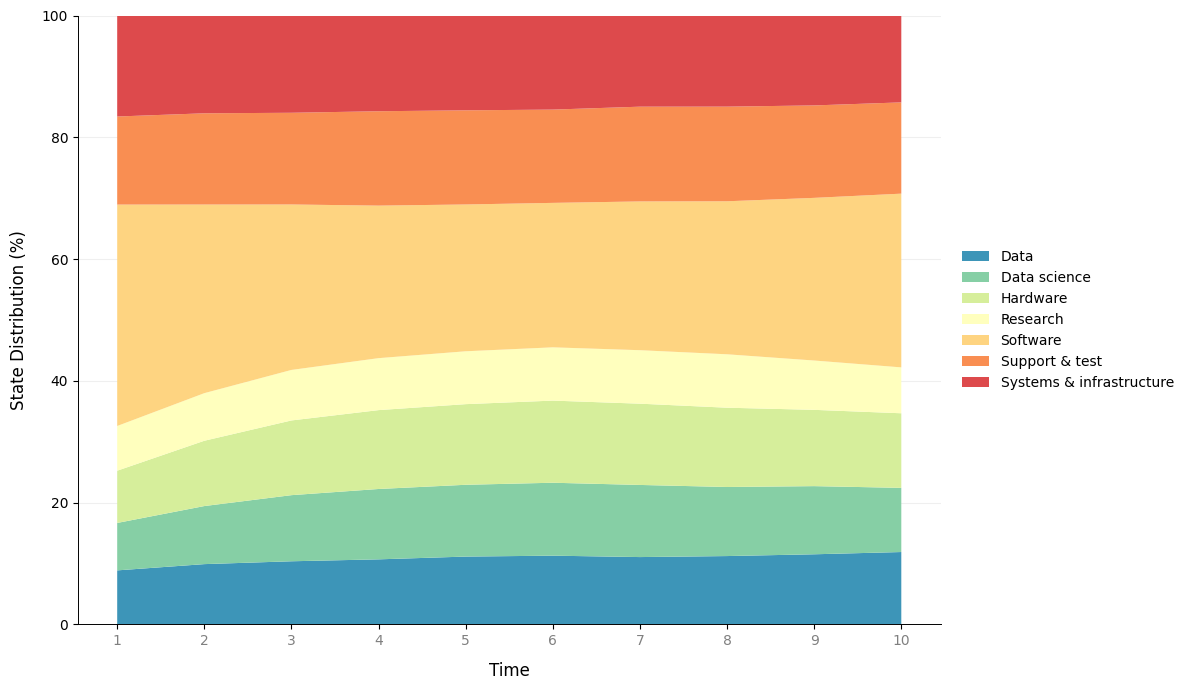

<Figure size 640x480 with 0 Axes>

In [74]:
plot_state_distribution(U50_sequence, 
                    # save_as='index_plot'
                    )

In [35]:
df_U85 = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/synthetic_detailed_U85_N50000.csv')

U85_sequence = SequenceData(data=df_U85,
                               time_type='age',
                               time=time_cols,
                               states=states,
                               )

U85_sequence.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 50000
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 50000,
 'n_unique': 2385,
 'uniqueness_rate': 0.0477,
 'counts': pattern_id
 1762    38
 1368    38
 1982    36
 849     36
 1508    35
         ..
 522      8
 1440     7
 2240     7
 907      6
 312      6
 Length: 2385, dtype: int64,
 'examples':    pattern_id  freq                         example
 0        1762    38  [6, 6, 6, 6, 5, 5, 5, 5, 5, 3]
 1        1368    38  [5, 5, 5, 7, 7, 6, 6, 6, 6, 5]
 2        1982    36  [7, 3, 3, 3, 3, 3, 4, 4, 4, 4]
 3         849    36  [5, 5, 3, 3, 2, 2, 2, 2, 2, 5]
 4        1508    35  [5, 6, 6, 6, 6, 6, 6, 6, 3, 3]
 5        1164    35  [5, 5, 5, 5, 5, 5, 5, 5, 5, 2]
 6         785    35  [5, 3, 7, 7, 7, 7, 7, 7, 7, 7]
 7         929    35  [5, 5, 5, 3, 3, 2, 2, 2, 2, 2]
 8         498    34  [3, 3, 6, 6, 6, 6, 6, 6, 6, 7]
 9        1086    34  [5, 5, 5, 5, 5, 4, 5, 5, 5, 5]}

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_index_grouped(df, title=None, cmap=None):
    # 1) 取状态列并转为tuple作为“序列键”
    state_cols = [c for c in df.columns if str(c).isdigit()]
    state_cols.sort(key=lambda x: int(x))
    seq_keys = df[state_cols].apply(tuple, axis=1)

    # 2) 统计每个序列的频数，并按“频数降序、字典序”排序
    counts = seq_keys.value_counts()
    grouping_order = counts.index.tolist()

    # 3) 为每行分配“所在组的排序索引”，并按该索引+组内顺序重排
    group_rank = {k: i for i, k in enumerate(grouping_order)}
    df['_grp'] = [group_rank[k] for k in seq_keys]
    # 可选：组内再按序列键的字典序稳定排序
    df['_key'] = seq_keys
    df_sorted = df.sort_values(['_grp','_key']).reset_index(drop=True)

    # 4) 做图：按新的行顺序画“拼图”
    M = df_sorted[state_cols].to_numpy()
    # 把类别映射到整数色标（保证不同数据集配色一致）
    cats = pd.Index(sorted(pd.unique(M.ravel())))
    lut = {c:i for i,c in enumerate(cats)}
    M_int = np.vectorize(lut.get)(M)

    plt.figure(figsize=(12,5))
    plt.imshow(M_int, aspect='auto', interpolation='none', cmap=cmap)
    plt.xlabel('Time')
    plt.ylabel('Sequences')

    # 5) 画组边界（粗线让“大组”一眼可见）
    group_sizes = counts.values
    boundaries = np.cumsum(group_sizes)
    for b in boundaries[:-1]:
        plt.axhline(b-0.5, color='white', linewidth=1.0, alpha=0.9)

    U = counts.size / len(df)
    plt.title(title or f'Grouped index plot — U={U:.3f}, uniques={counts.size}, n={len(df)}')
    plt.tight_layout()
    plt.show()

    # 可选：配套频数分布，直观看U
    plt.figure(figsize=(6,3))
    plt.hist(group_sizes, bins=50, log=True)
    plt.xlabel('Group size (identical sequences)')
    plt.ylabel('Count (log scale)')
    plt.title('Distribution of identical-sequence group sizes')
    plt.tight_layout()
    plt.show()

    # 可选：前K原型的累积占比
    cs = np.cumsum(group_sizes) / len(df)
    plt.figure(figsize=(6,3))
    plt.plot(np.arange(1, len(cs)+1), cs)
    plt.xlabel('Top-k unique sequences')
    plt.ylabel('Cumulative share')
    plt.title('Coverage curve of top unique sequences')
    plt.tight_layout()
    plt.show()


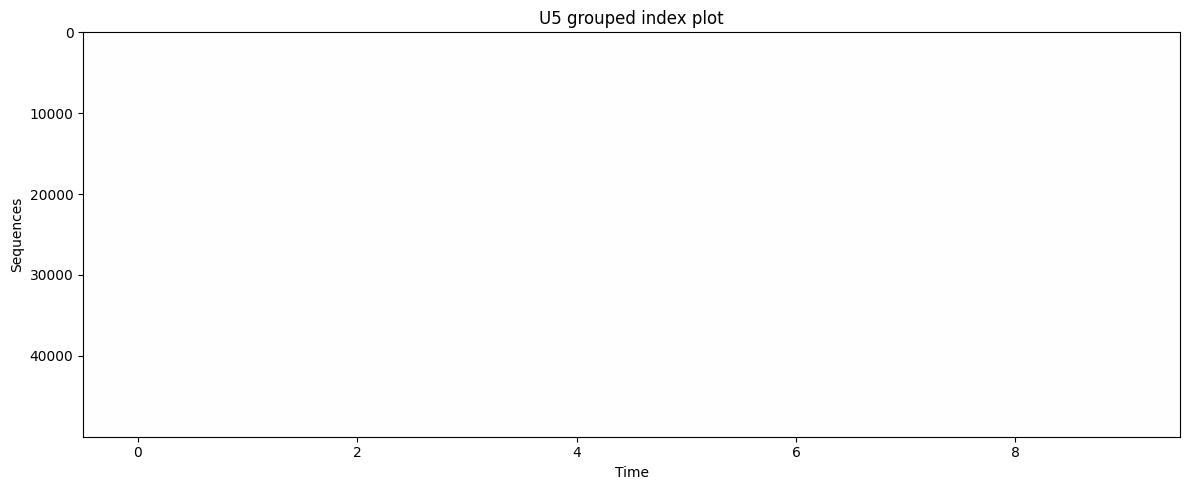

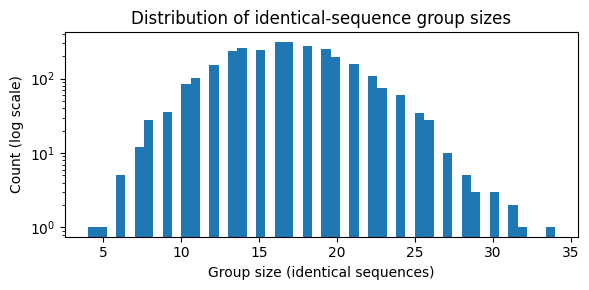

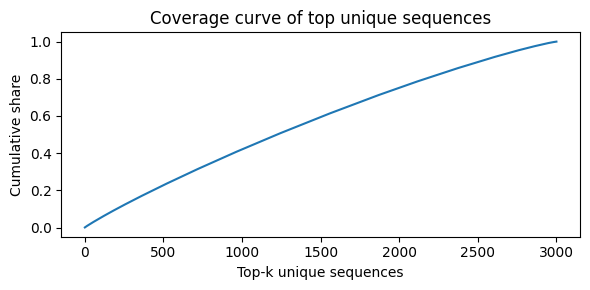

In [44]:
plot_index_grouped(df_U5, title='U5 grouped index plot')

## 欣怡的随机数据-八十万

In [69]:
df_80w = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/detailed_expanded_80w.csv')

# Rename columns from C1, C2, ..., C10 to 1, 2, ..., 10
df_80w.rename(columns={f'C{i}': str(i) for i in range(1, 11)}, inplace=True)

df_80w_sequence = SequenceData(data=df_80w,
                               time_type='age',
                               time=time_cols,
                               states=states,
                               )

df_80w_sequence.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 800000
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 800000,
 'n_unique': 20289,
 'uniqueness_rate': 0.02536125,
 'counts': pattern_id
 9353     58638
 19832    42933
 305      21196
 9355      5421
 15504     5366
          ...  
 13602        1
 13601        1
 13600        1
 13599        1
 59           1
 Length: 20289, dtype: int64,
 'examples':    pattern_id   freq                         example
 0        9353  58638  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
 1       19832  42933  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
 2         305  21196  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 3        9355   5421  [5, 5, 5, 5, 5, 5, 5, 5, 5, 7]
 4       15504   5366  [6, 5, 5, 5, 5, 5, 5, 5, 5, 5]
 5       18914   5327  [6, 6, 6, 5, 5, 5, 5, 5, 5, 5]
 6       17757   5315  [6, 6, 5, 5, 5, 5, 5, 5, 5, 5]
 7       19810   5300  [6, 6, 6, 6, 6, 6, 6, 5, 5, 5]
 8       12999   5292  [6, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 9       19447   5275  [6, 6, 6, 6, 5, 5, 5, 5, 5, 5]}

In [10]:
raw_df = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/detailed_for_10_years.csv')

time_cols = []

for i in list(range(1, 11)):
    time_cols.append(str(i))
    
states = ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']

# Rename columns from C1, C2, ..., C10 to 1, 2, ..., 10
raw_df.rename(columns={f'C{i}': str(i) for i in range(1, 11)}, inplace=True)

raw_df_sequence = SequenceData(data=raw_df,
                               time_type='age',
                               time=time_cols,
                               states=states,
                               )

raw_df_sequence.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 32628
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 32628,
 'n_unique': 2033,
 'uniqueness_rate': 0.06230844673286748}

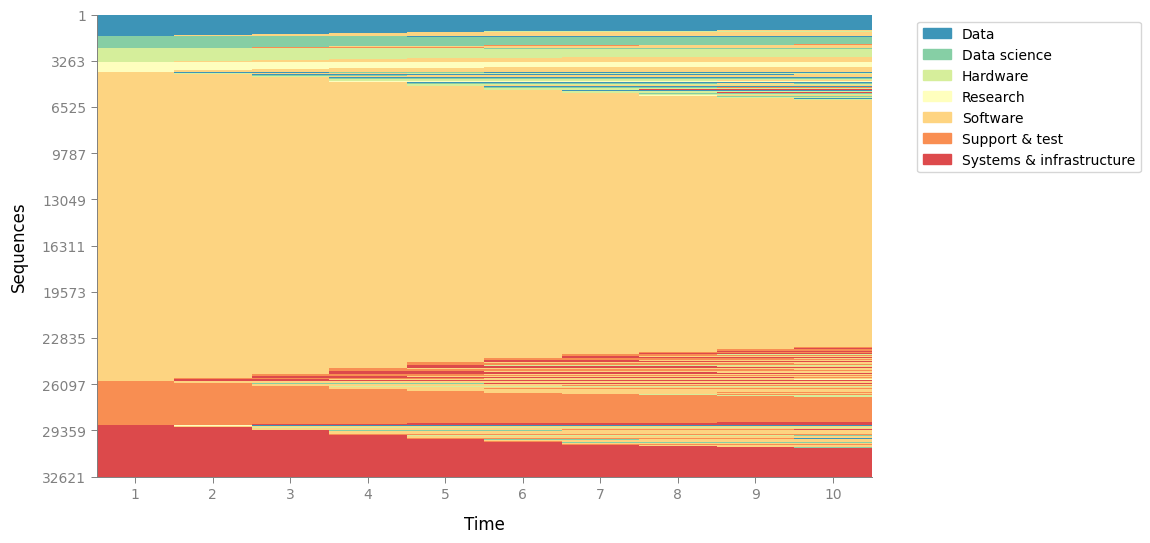

<Figure size 640x480 with 0 Axes>

In [11]:
plot_sequence_index(raw_df_sequence, 
                    # save_as='index_plot'
                    )

In [12]:
df_50w = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/2509_writing_paper/server_work/U50_N800k/synthetic_detailed_U50_N500000.csv')

df_50w_sequence = SequenceData(data=df_50w,
                                 time_type='age',
                                 time=time_cols,
                                 states=states,
                                 )

df_50w_sequence.uniqueness_stats()


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 500000
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']
[>] Labels: ['Data', 'Data science', 'Hardware', 'Research', 'Software', 'Support & test', 'Systems & infrastructure']


{'n_sequences': 500000, 'n_unique': 50111, 'uniqueness_rate': 0.100222}